# Naive Baeyes Algorithm
It is a very simple classificiation based on **Baeyes Theorem**.
Assumptions:
- ### IID:
It states that all the features which are used in classification are independent and identical from each other.
    - **Independent**: This means that each feature is purely independent of each other and one does not effect another.
    - **Identical**: This means that we are assuming that each of the feature is obtained from the same distribution , in this case Mullitvariate Gaussian.
#### Baeyes Theorem:
$$P(A|B) = \frac{P(B|A)P(A)}{P(B)}$$
For machine learning , naive baeyes can be written as :
$$P(class|data) = \frac{P(data|class)P(class)}{P(data)}$$
- P(class) : Prior Probability , it is the probability of class in the given dataset.
- P(data): Total probability 
- P(data|clas) : Likelihood Probability , probability of class having a given data value associated to it.
- P(class| data) : Posterior Probability , probability of data having a particular class

![](https://i.ytimg.com/vi/eho8xH3E6mE/hqdefault.jpg)

In [1]:
import pandas as pd 
import numpy as np
import scipy.stats as s
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
raw_data = pd.read_csv("mushrooms.csv")

In [3]:
raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [5]:
raw_data['class'].unique()


array(['p', 'e'], dtype=object)

In [6]:
def count(col_name):
    return raw_data.groupby(col_name).count().iloc[:,0]

In [7]:
count('class')

class
e    4208
p    3916
Name: cap-shape, dtype: int64

In [8]:
np.array(raw_data.columns[1:])

array(['cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype=object)

In [9]:
col_names = np.array(raw_data.columns[1:21]).reshape(5,4)

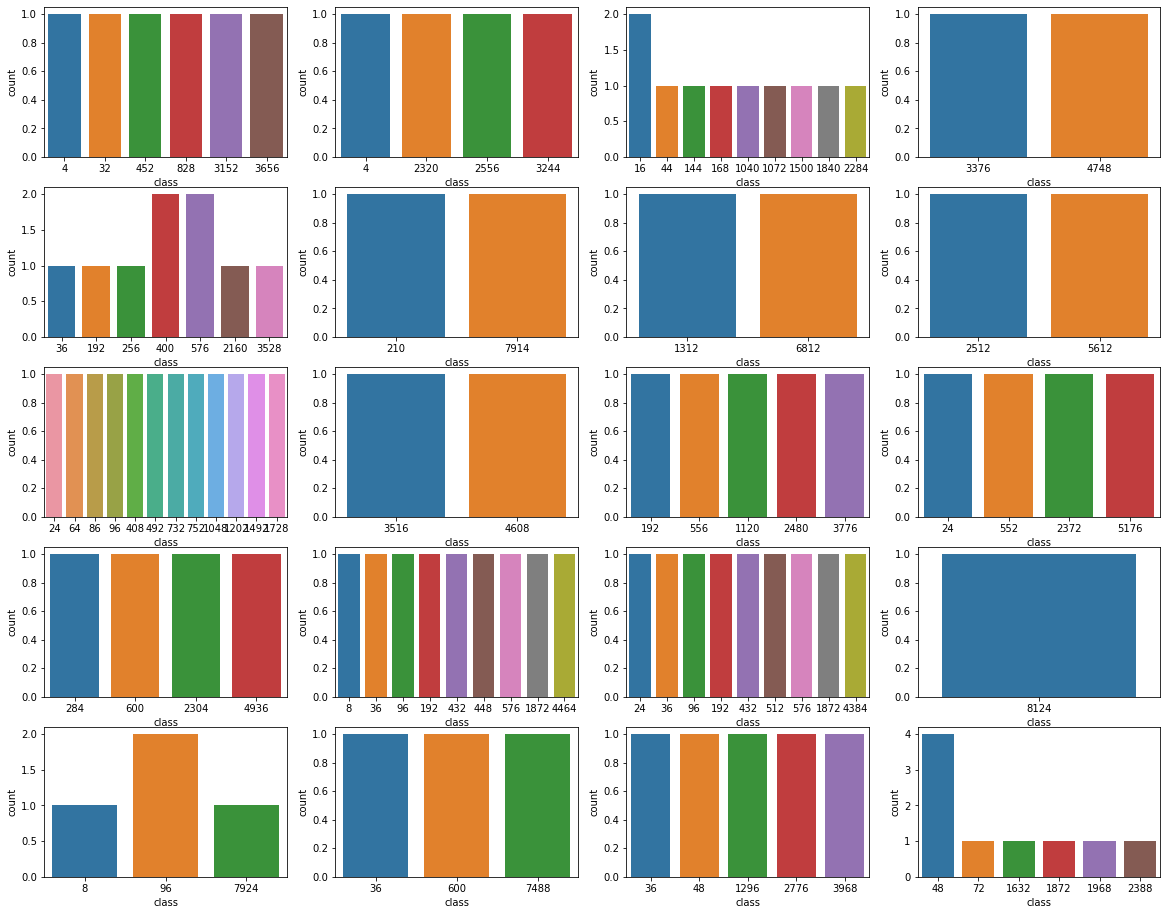

In [10]:
plt.figure(figsize=(20,16))
for i in range(5):
    for j in range(4):
        ax = plt.subplot2grid((5,4), (i,j))
        ax = sns.countplot(count(col_names[i,j]))
plt.show()

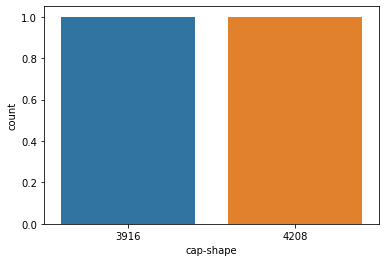

In [11]:
sns.countplot(raw_data.groupby('class').count().iloc[:,0])

In [12]:
class PrepareData:
    def __init__(self,data):
        self.data = data
        self.m = None
        self.features = self.preparing_features()
        self.category = None
        self.c0_data = None
        self.c1_data = None
        self.c0_train_data = None
        self.c1_train_data = None
        self.c0_test_data = None
        self.c1_test_data = None
        self.train_data = None
        self.test_data = None
        self.train_labels = None
        self.test_labels = None
       
    def preparing_features(self):
        '''
        Dealing with the features with only one unique value or ambiguous values as features
        '''
        for i in self.data.columns:
            if self.data[i].nunique() <=1:
                self.data.drop(i,axis=1,inplace=True)
            elif  "?" in self.data[i].unique() or " " in self.data[i].unique():
                self.data.drop(i,axis=1,inplace=True)
        self.features = np.array(self.data.columns[1:])
        return  self.features 
    def train_test_split(self):
        '''
        Returns :
        test_data -> test dataset after splitting the raw data
        c0_train_data -> train data split according to their class , data belonging to class "p"
        c1_train_data -> train data split according to their class , data belonging to class "e"
        '''
        self.m = int(0.65*self.data.shape[0])
        self.category = self.data['class'].unique()
        
        self.c0_data = self.data[self.data['class'] == self.category[0]]
        self.c0_train_data = self.c0_data.iloc[:self.m//2]
        self.c0_test_data = self.c0_data.iloc[self.m//2:]
        self.c1_data = self.data[self.data['class'] == self.category[1]]
        self.c1_train_data = self.c1_data.iloc[:self.m//2]
        self.c1_test_data = self.c1_data.iloc[self.m//2:]
        self.train_data = pd.concat([self.c0_train_data , self.c1_train_data])
        self.test_data = pd.concat([self.c0_test_data,self.c1_test_data])
        self.test_data['class'].replace(to_replace=[self.category[0],self.category[1]],value=[True,False],inplace=True)
        return self.test_data,self.c0_train_data,self.c1_train_data

In [13]:
raw_data_copy = raw_data

In [14]:
data = PrepareData(raw_data_copy)

In [15]:
features = data.features
test_data,c0_train_data,c1_train_data = data.train_test_split()
category = data.category

In this type of data where each value is categorical and using any pdf is impossible then we use \
 the probabilities calculated and use them instead to calculate Likelihood Probability. \
**BUT**\
Multiplying so many values will reach beyond the capability of python(lowest value possible is of 10^(-36) so we will calculate the probabilties by converting them into **Negative Log Probability** .


$$P(class = c | X) = \frac{P(X | class = c)}{P(X)}$$

$$P(class = c| cap-shape = x \cap gill-color = k) = \frac{P(cap-shape = x \cap gill-color = k | class = C)}{P(cap-shape = x|class = 0) + P(cap-shape = x|class = 1) + P(gill-color = k|class = 0) + P(gill-colo' = k|class = 1)}$$

## Laplace Smoothening :
It is a smoothing technique that helps tackle the problem of zero probability in the Naïve Bayes machine learning algorithm.In terms of Machine Learning the formula for Laplace smoothening,
$$P = 1/(N + k\lambda )$$
- N : Total number of observations
- K : Value of unique features present in the dataset

In [16]:
class NaiveBaeyes:
    def __init__(self,data,test_data,c0_train_data,c1_train_data,features,category):
        self.data = data
        self.test_data = test_data
        self.c0_train_data = c0_train_data
        self.c1_train_data =c1_train_data
        self.features = features
        self.category = category
        self.c0_p = {}
        self.c1_p = {}
        self.negative_prob = self.predict()
        self.accu =None
    def feature_p_values(self,data, training_data, feature_name):
        '''
        The function to find probability for each unique feature value for each feature and also performing 
        Laplacian Smoothening (for the feature not present in int dataset) to prevent zero probability.
        Returns:
        blank_dict -> A dicitionary with (feature name,feature) as keys and negative log probability as value
        '''
        unique_values = data[feature_name].unique()

        blank_dict = {}

        train_unique_values = training_data[feature_name].unique()

        for u_value in unique_values:

                if u_value not in train_unique_values:

                    blank_dict[u_value] = -np.log(1 / (training_data.shape[0] + unique_values.shape[0]))

                else:

                    blank_dict[u_value] = -np.log(training_data[training_data[feature_name] == u_value].shape[0] / training_data.shape[0])

        return blank_dict
    def feature_probability(self):
        '''
        To calculate feature probability for both class dataset 
        '''
        for i in self.features:
            self.c0_p[i]=self.feature_p_values(self.data.data,self.c0_train_data,i)

        for i in self.features:
            self.c1_p[i] = self.feature_p_values(self.data.data,self.c1_train_data,i)
        
    def predict(self):
        '''
        Calculate negative probability for test data by summing each negative log probability for each feature value present in 
        the datset.
        Return:
        negative_prob -> Boolean aray with True for class "0" / "p" and False for class "1"/ "e"
        '''
        self.feature_probability()
        self.negative_prob= []
        for i in range(0,self.test_data.shape[0]):
            count_0 = 0
            count_1 = 0
            for f_name in self.test_data.iloc[:,1:].columns:
                count_0 =+self.c0_p[f_name][self.test_data.iloc[i][f_name]]
                count_1 =+self.c1_p[f_name][self.test_data.iloc[i][f_name]]
            if count_0 < count_1:
                self.negative_prob.append(self.category[0])
            else:
                self.negative_prob.append(self.category[1])
        for i in range(0,len(self.negative_prob)):
            if self.negative_prob[i] == 'p':
                self.negative_prob[i]=True
            else:
                self.negative_prob[i] = False
        return self.negative_prob
    def accuracy(self):
        '''
        Calculate the test accuracy by using negative probabilities 
        '''
        boolean_mask = np.array(self.test_data['class'])
        self.accu = np.count_nonzero(boolean_mask==self.negative_prob)
        self.accu /= boolean_mask.shape[0]
        return f"Test Accuracy : {self.accu}"

In [17]:
model = NaiveBaeyes(data , test_data ,c0_train_data,c1_train_data,features,category)

In [18]:
model.accuracy()

'Test Accuracy : 0.7426160337552743'